<a href="https://colab.research.google.com/github/SiddardhaShayini/Comprehensive-Python-Implementation-for-Data-Analysis-and-Machine-Learning-Algorithms/blob/main/Comprehensive_Python_Implementation_for_Data_Analysis_and_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [17]:
# Load house prices dataset
url = 'https://raw.githubusercontent.com/SiddardhaShayini/Comprehensive-Python-Implementation-for-Data-Analysis-and-Machine-Learning-Algorithms/refs/heads/main/house_data.csv'
house_data = pd.read_csv(url)

In [18]:
# Load iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

In [19]:
# Compute Central Tendency Measures and Dispersion for house prices
print("Central Tendency Measures and Dispersion for House Prices:")
columns_to_analyze = ['price', 'sqft_living', 'sqft_lot']
for col in columns_to_analyze:
    print(f"\nColumn: {col}")
    print(f"Mean: {np.mean(house_data[col])}")
    print(f"Median: {np.median(house_data[col])}")
    mode_result = stats.mode(house_data[col], keepdims=True)
    print(f"Mode: {mode_result.mode[0]}")
    print(f"Variance: {np.var(house_data[col])}")
    print(f"Standard Deviation: {np.std(house_data[col])}")

Central Tendency Measures and Dispersion for House Prices:

Column: price
Mean: 540088.1417665294
Median: 450000.0
Mode: 350000.0
Variance: 134776142225.57248
Standard Deviation: 367118.7031813722

Column: sqft_living
Mean: 2079.8997362698374
Median: 1910.0
Mode: 1300
Variance: 843494.6523725768
Standard Deviation: 918.4196493828824

Column: sqft_lot
Mean: 15106.967565816869
Median: 7618.0
Mode: 5000
Variance: 1715579393.304026
Standard Deviation: 41419.55327262748


In [20]:
# Compute Central Tendency Measures for iris dataset
print("\nCentral Tendency Measures for Iris Dataset:")
iris_columns = iris.feature_names
for col in iris_columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {np.mean(iris_data[col])}")
    print(f"Median: {np.median(iris_data[col])}")
    print(f"Variance: {np.var(iris_data[col])}")
    print(f"Standard Deviation: {np.std(iris_data[col])}")


Central Tendency Measures for Iris Dataset:

Column: sepal length (cm)
Mean: 5.843333333333334
Median: 5.8
Variance: 0.6811222222222222
Standard Deviation: 0.8253012917851409

Column: sepal width (cm)
Mean: 3.0573333333333337
Median: 3.0
Variance: 0.1887128888888887
Standard Deviation: 0.43441096773549437

Column: petal length (cm)
Mean: 3.7580000000000005
Median: 4.35
Variance: 3.0955026666666674
Standard Deviation: 1.7594040657753032

Column: petal width (cm)
Mean: 1.1993333333333336
Median: 1.3
Variance: 0.5771328888888888
Standard Deviation: 0.7596926279021594


In [21]:
# Simple Linear Regression using house prices dataset
print("\nSimple Linear Regression:")
simple_X = house_data[['sqft_living']]
simple_y = house_data['price']
simple_X_train, simple_X_test, simple_y_train, simple_y_test = train_test_split(simple_X, simple_y, test_size=0.2, random_state=42)
simple_model = LinearRegression()
simple_model.fit(simple_X_train, simple_y_train)
predictions = simple_model.predict(simple_X_test)
print(f"Coefficients: {simple_model.coef_}")
print(f"Intercept: {simple_model.intercept_}")
print(f"MSE: {mean_squared_error(simple_y_test, predictions)}")


Simple Linear Regression:
Coefficients: [279.55477932]
Intercept: -41999.18603993731
MSE: 76484977061.77612


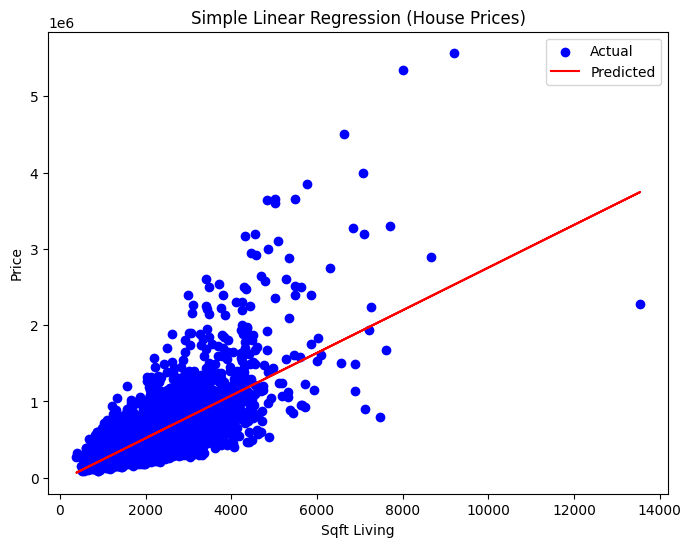

In [22]:
# Plot Simple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(simple_X_test, simple_y_test, color='blue', label='Actual')
plt.plot(simple_X_test, predictions, color='red', label='Predicted')
plt.title('Simple Linear Regression (House Prices)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
# Multiple Linear Regression for House Price Prediction
print("\nMultiple Linear Regression:")
house_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = house_data[house_features]
y = house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
predictions = multi_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, predictions)}")


Multiple Linear Regression:
MSE: 45998562877.062294


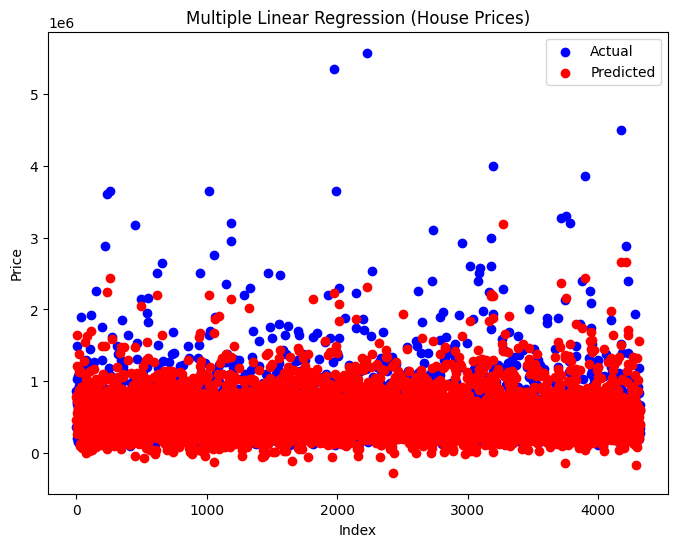

In [24]:
# Plot Predictions vs Actual for Multiple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.title('Multiple Linear Regression (House Prices)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
# Decision Tree using iris dataset
print("\nDecision Tree (Iris Dataset):")
X = iris_data[iris.feature_names]
y = iris_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Decision Tree (Iris Dataset):
Accuracy: 1.0


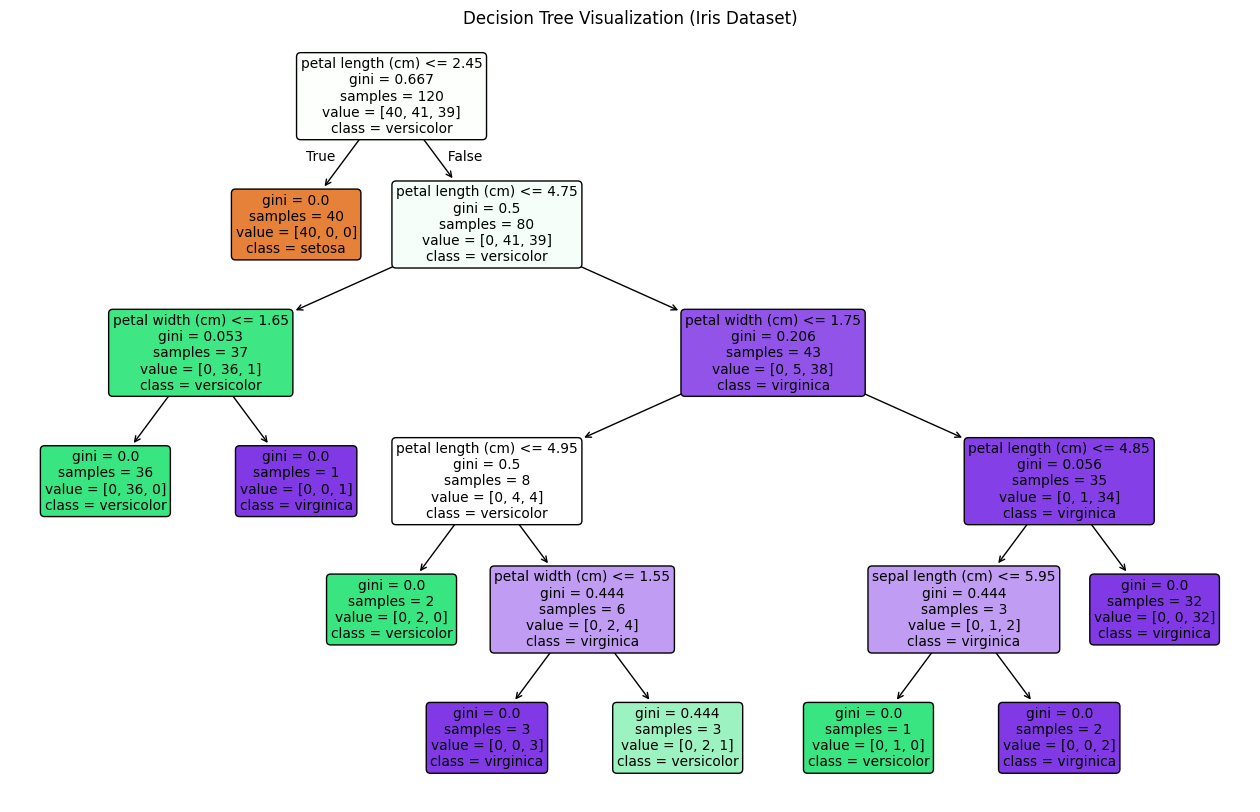

In [35]:
# Plot Decision Tree feature importances
plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization (Iris Dataset)')
plt.show()

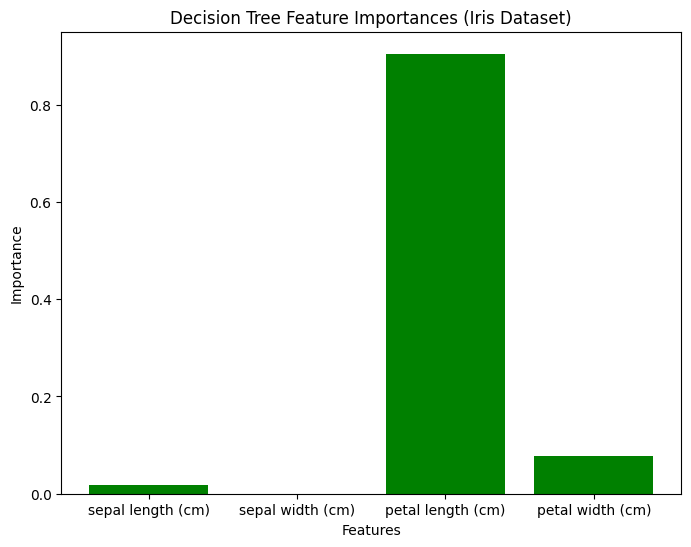

In [26]:
# Plot Decision Tree feature importances
plt.figure(figsize=(8, 6))
plt.bar(iris.feature_names, dt_model.feature_importances_, color='green')
plt.title('Decision Tree Feature Importances (Iris Dataset)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [27]:
# K-Nearest Neighbors (KNN) using iris dataset
print("\nKNN (Iris Dataset):")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


KNN (Iris Dataset):
Accuracy: 1.0


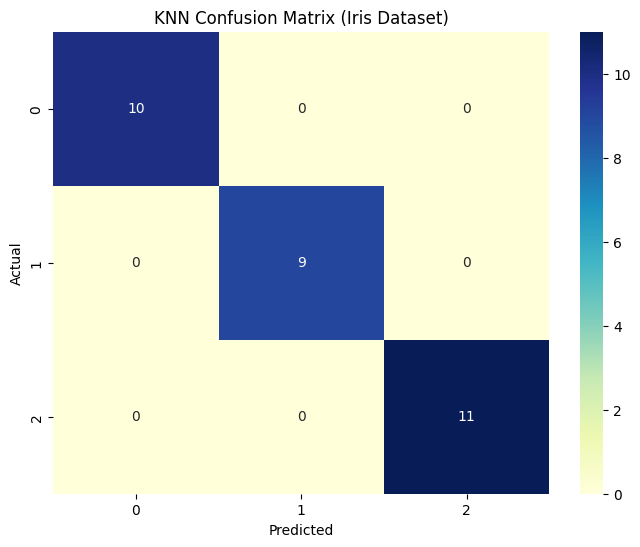

In [28]:
# Plot KNN predictions
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title('KNN Confusion Matrix (Iris Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Logistic Regression using iris dataset
print("\nLogistic Regression (Iris Dataset):")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Logistic Regression (Iris Dataset):
Accuracy: 1.0


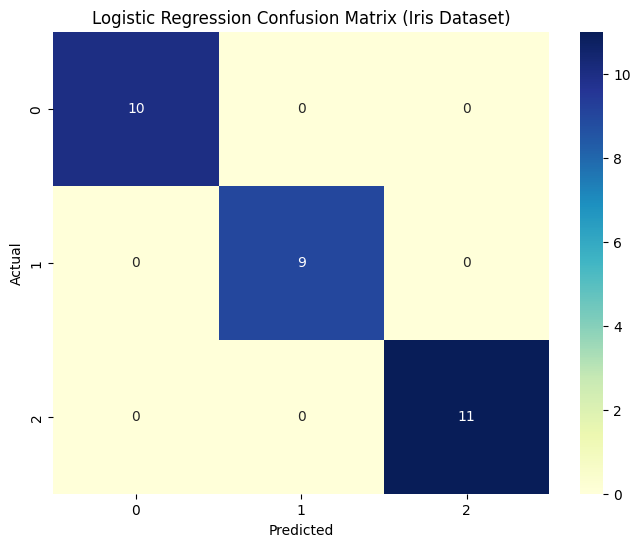

In [30]:
# Plot Logistic Regression confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Logistic Regression Confusion Matrix (Iris Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# K-Means Clustering using iris dataset
print("\nK-Means Clustering (Iris Dataset):")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
iris_data['Cluster'] = kmeans.labels_
print("Cluster Centers:")
print(kmeans.cluster_centers_)


K-Means Clustering (Iris Dataset):
Cluster Centers:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


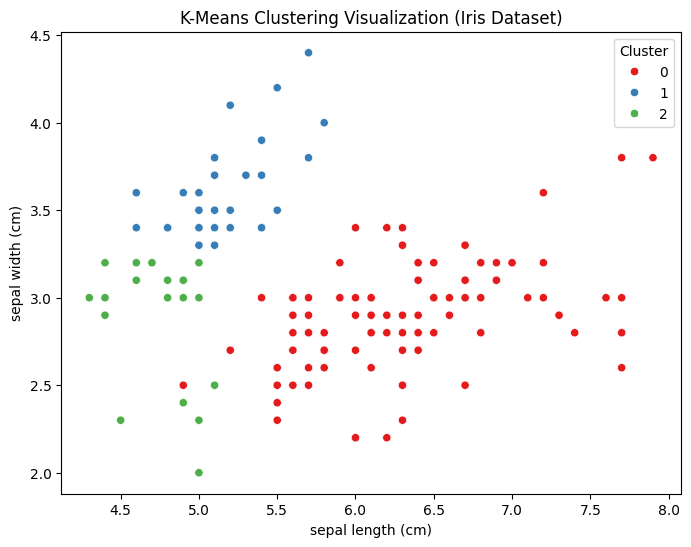

In [32]:
# Visualize Clustering for iris dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_data, x=iris.feature_names[0], y=iris.feature_names[1], hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Visualization (Iris Dataset)')
plt.show()